In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
import pandas as pd

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Fitting and overfitting

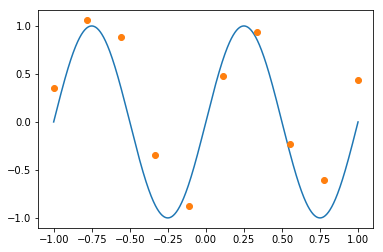

In [6]:
x=np.linspace(-1,1,1000)
y=np.sin(2*np.pi*x)
plt.plot(x,y,'-')
x=np.linspace(-1,1,10)
eps=0.5
y=np.sin(2*np.pi*x)+st.norm.rvs(size=len(x),loc=0,scale=eps)

plt.plot(x,y,'o')
plt.show()

In [7]:
def datagen(x,eps):
    return np.sin(2*np.pi*x) + st.norm.rvs(size=len(x),loc=0,scale=eps)

def datagen2(x,f,args,eps):
    return f(x,args) + st.norm.rvs(size=len(x),loc=0,scale=eps)

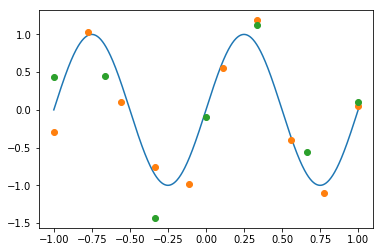

In [9]:
x=np.linspace(-1,1,1000)
y=np.sin(2*np.pi*x)
plt.plot(x,y,'-')

x=np.linspace(-1,1,10)
y=datagen(x,0.2)
plt.plot(x,y,'o')

x=np.linspace(-1,1,7)
y=datagen(x,0.5)
plt.plot(x,y,'o')
plt.show()

[ 8.34533209e+03 -7.91864842e+03 -8.58256445e+03 -5.24006938e+02
  7.66654116e+03  8.67495527e+03  8.06507224e+02 -8.86897991e+03
 -8.05531120e+03  5.83965327e+03  1.05304553e+04 -1.16317976e+04
  4.40550139e+03 -7.40243764e+02  5.27965274e+01 -2.16626509e-01]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: RankWarning: Polyfit may be poorly conditioned
  app.launch_new_instance()


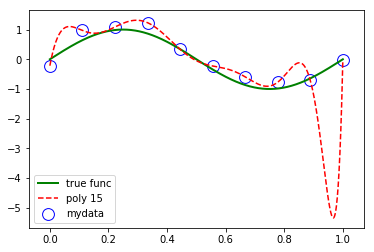

In [14]:
#FITTING DATA WITH POLYNOMIALS
#POLY MINIMIZE THE SQUARED ERROR
#scipy.optimize.curve_fit

x=np.linspace(0,1,1000)
plt.plot(x,np.sin(2*np.pi*x),'g',linewidth=2,label='true func')


X=np.linspace(0,1,10)
eps=0.2
Y=datagen(X,eps) 
plt.scatter(X,Y,s=140,label='mydata',facecolors='w',edgecolor='b')


m=15
p=np.polyfit(X, Y, m)
print(p)
#funzione polinomio
yexp=np.poly1d(p)
plt.plot(x,yexp(x),'r--',label='poly '+str(m))
plt.legend()
plt.show()

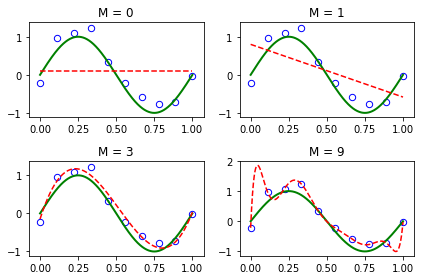

In [15]:
for i,m in enumerate([0,1,3,9]):
    plt.subplot(221+i)
    p=np.polyfit(X, Y, m)
    yexp=np.poly1d(p)
    plt.scatter(X,Y,s=40,label='mydata',facecolors='w',edgecolor='b')
    plt.plot(x,np.sin(2*np.pi*x),'g',linewidth=2,label='true func')
    plt.plot(x,yexp(x),'r--',label='poly '+str(m))
    plt.title('M = '+str(m))

plt.tight_layout()
plt.show()

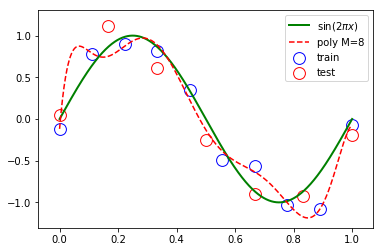

In [16]:
x=np.linspace(0,1,1000)
plt.plot(x,np.sin(2*np.pi*x),'g',linewidth=2,label='$\sin(2\pi x)$')

X1=np.linspace(0,1,10)
train=datagen(X1,eps)
plt.scatter(X1,train,s=140,label='train',facecolors='w',edgecolor='b')


m=8
p=np.polyfit(X1, train, m)
yexp=np.poly1d(p)
plt.plot(x,yexp(x),'r--',label='poly M='+str(m))


X=np.linspace(0,1,7)
eps=0.25
test=datagen(X,eps)
plt.scatter(X,test,s=140,label='test',facecolors='w',edgecolor='r')

plt.legend()
plt.show()

In [18]:
def RMS(y,yexp):
    s = np.sum((yexp-y)**2)
    n=len(y)
    return np.sqrt(s)/n

In [19]:
mmax=25
testRMS=np.empty(mmax)
trainRMS=np.empty(mmax)
pp=np.zeros((mmax,mmax))
M=np.arange(mmax)
for m in M:
    p=np.polyfit(X1, train, m)
    #print(m,p)
    for i in np.arange(m+1):
            pp[i,m]=p[i]
    #print(p,pp[:,m])
        
    fexp=np.poly1d(p)
    
    trainexp=fexp(X1)
    trainRMS[m]=RMS(train,trainexp)
    
    testexp=fexp(X)
    testRMS[m]=RMS(test,testexp)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
/usr/loc

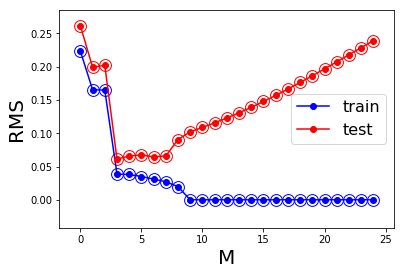

In [31]:
#OVERFITTING: GOOD PERFORMANCE ON TRAIN BAD ON TEST     
plt.scatter(M,trainRMS,s=140,facecolors='w',edgecolor='b')  
plt.scatter(M,testRMS,s=140,facecolors='w',edgecolor='r')
plt.plot(M,trainRMS,'ob-',label='train')  
plt.plot(M,testRMS,'or-',label='test')
plt.ylabel('RMS',fontsize=20)
plt.xlabel('M',fontsize=20)
plt.legend(loc='best',fontsize=16)
plt.show()

In [35]:
# EFFECT OF OVER FITTING ON FIT COEFFICIENTS
mypolyfit=pd.DataFrame(pp).apply(lambda x: np.round(x,3))
#mypolyfit.to_csv('./mypolyfit.csv')
mypolyfit.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.052,-1.488,-0.542,21.003,3.140,31.681,153.657,713.883,-5340.931,-46436.846,...,-4570.359,-3455.952,-2669.169,-2100.742,-1681.521,-1366.567,-1125.963,-939.351,-792.608,-675.749
1,0.000,0.692,-0.945,-32.047,14.724,-76.063,-429.290,-2344.933,22077.605,203624.876,...,3568.559,1791.522,803.738,252.036,-53.792,-218.906,-302.746,-339.531,-349.250,-343.703
2,0.000,0.000,0.612,11.009,-28.132,83.823,442.163,3013.686,-37239.012,-372888.509,...,4545.804,3280.284,2252.855,1492.136,952.087,577.127,320.343,146.364,29.785,-47.221
3,0.000,0.000,0.000,-0.114,10.233,-52.578,-184.344,-1918.803,32922.897,369968.623,...,1163.552,1950.390,1948.822,1659.313,1305.635,977.617,704.065,487.892,322.336,198.098
4,0.000,0.000,0.000,0.000,-0.094,13.166,9.727,650.639,-16285.081,-215762.719,...,-2897.846,-654.516,497.999,964.262,1058.625,976.080,824.886,660.209,507.392,376.042


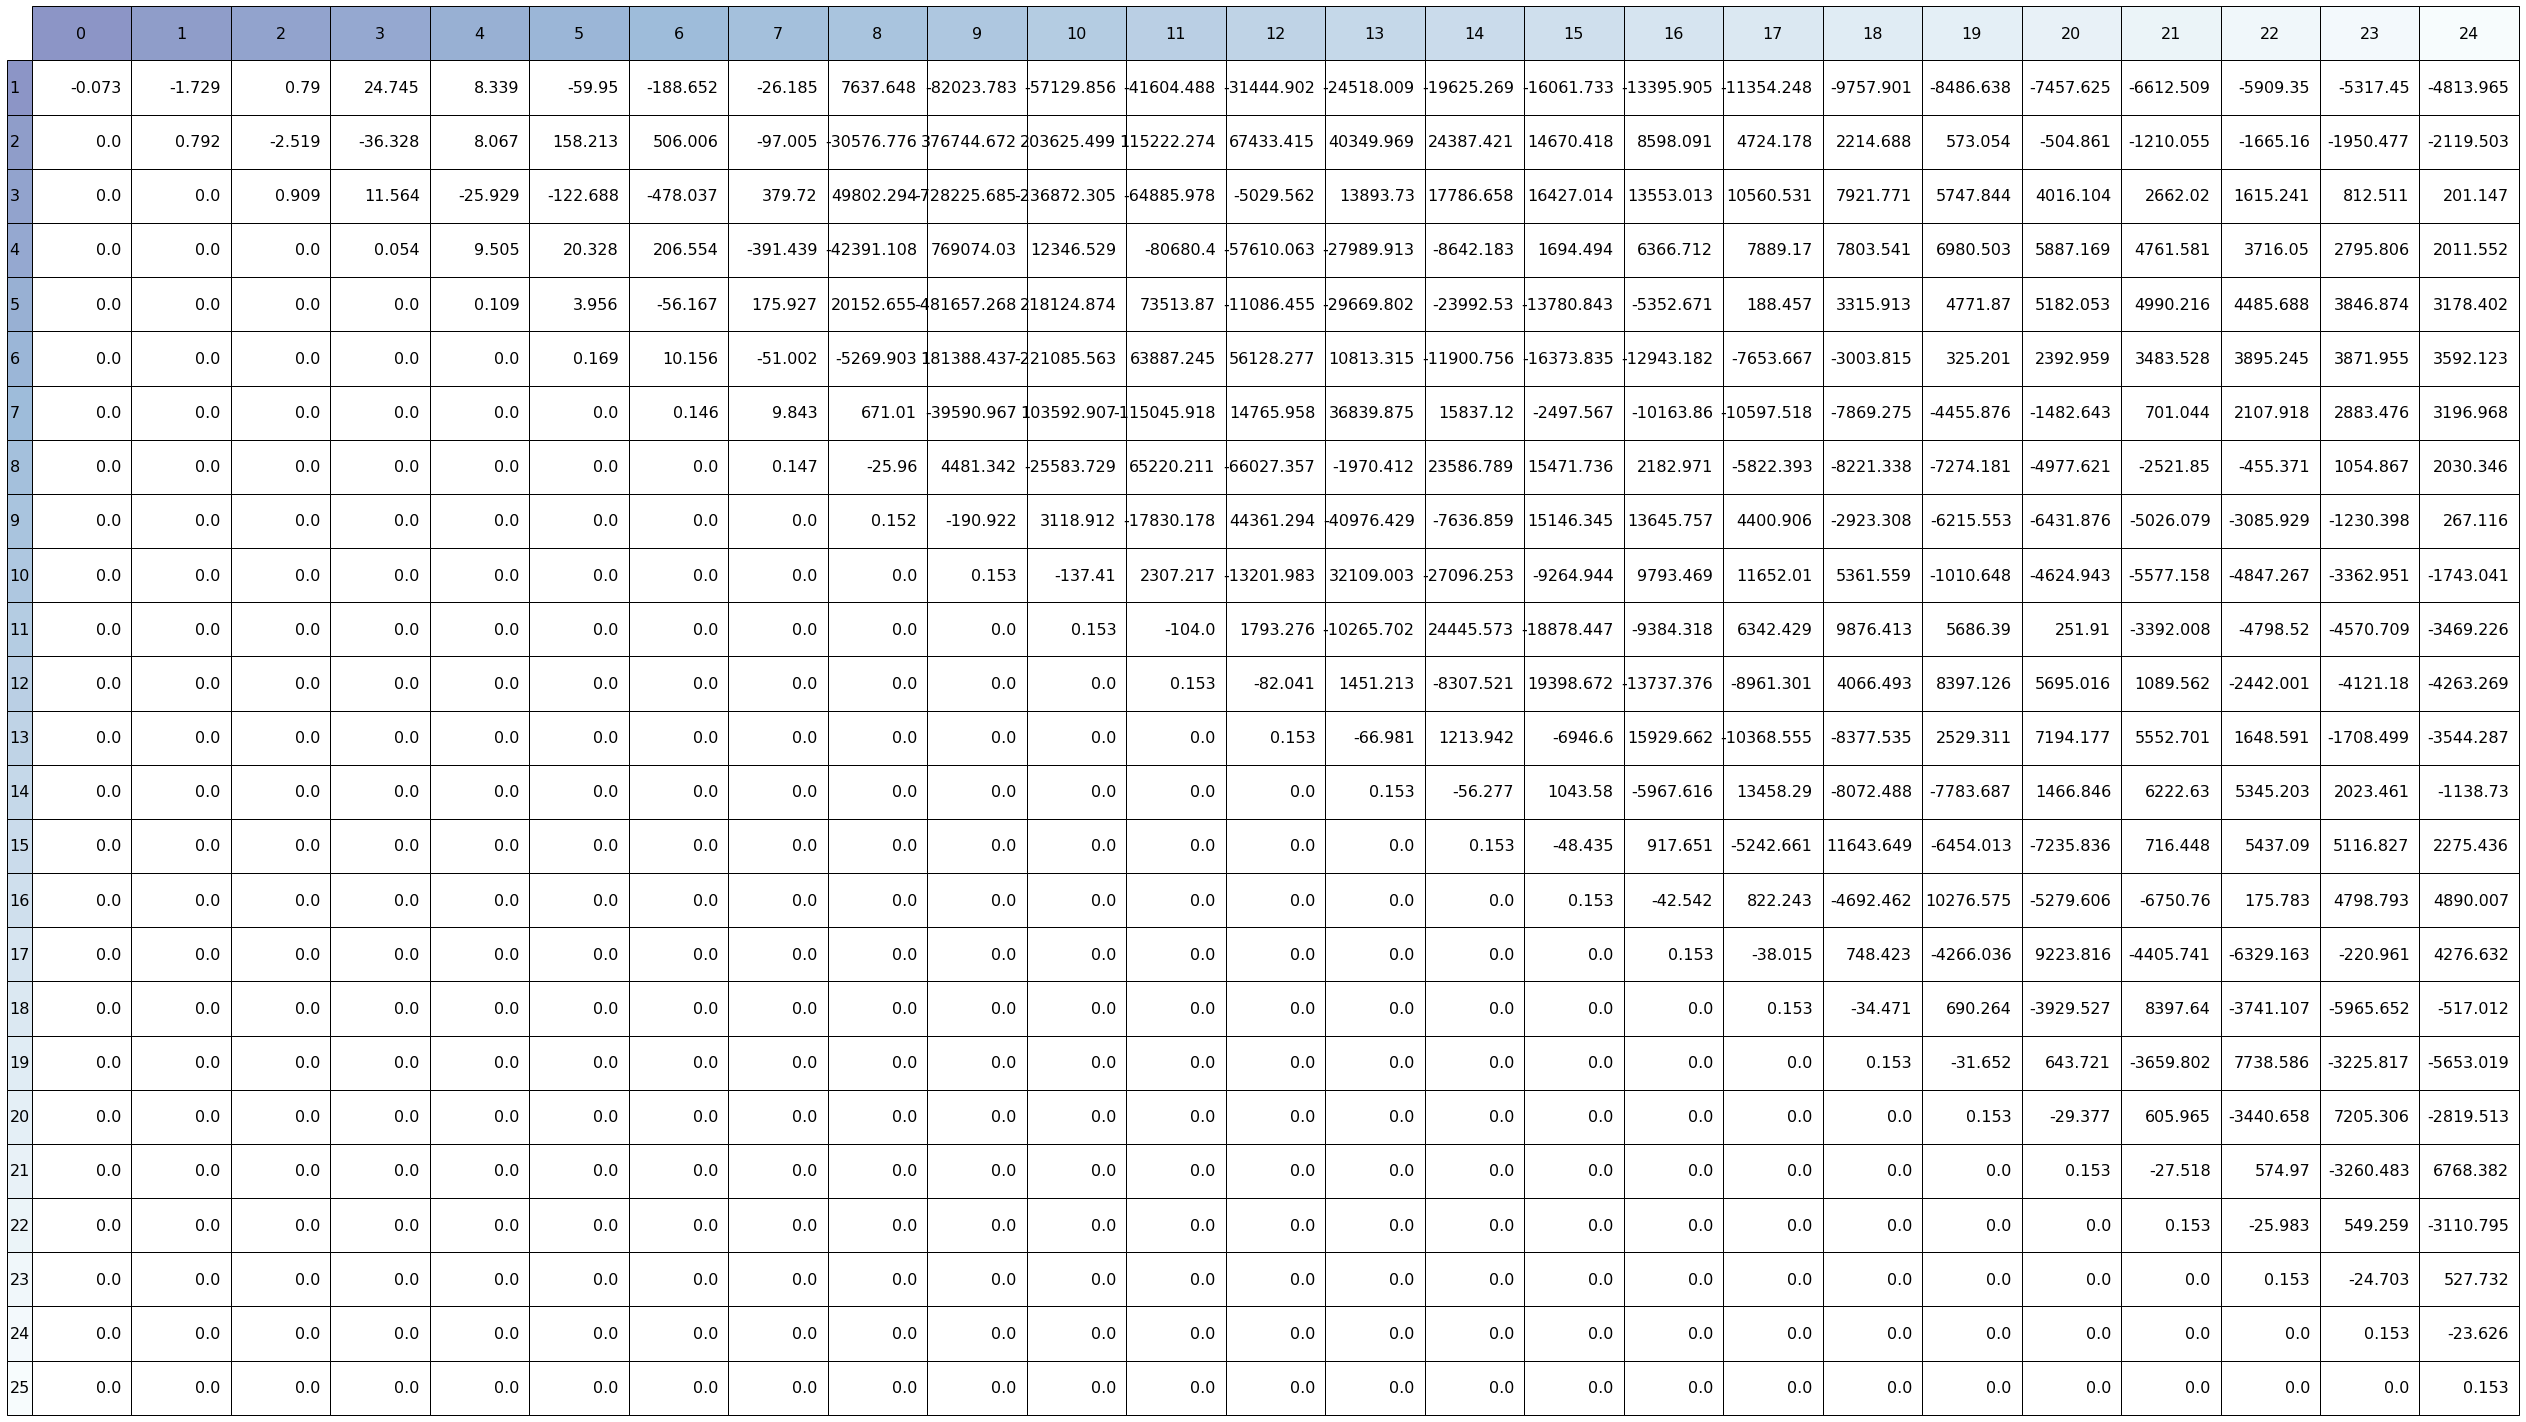

In [35]:
def mytable(mypolyfit):
    import numpy as np
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(18,4))
    data = list(mypolyfit.values.astype(str))
    columns = tuple(mypolyfit.columns.astype(str))
    rows = np.arange(1,len(mypolyfit)+1).astype(str)  
    
    # Get some pastel shades for the colors
    ccolors = plt.cm.BuPu(np.linspace(0, 0.5, len(columns)))
    rcolors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))    
    # Plot bars and create text labels for the table
    cell_text = data
    # Reverse colors and text labels to display the last value at the top.
    rcolors = rcolors[::-1]
    ccolors = ccolors[::-1]
    # Add a table at the bottom of the axes
    the_table = plt.table(cellText=cell_text,
                          #colWidths=[1/15] * 15,
                          rowLabels=rows,
                          colColours=ccolors,
                          rowColours=rcolors,
                          colLabels=columns,
                          loc='center')
    the_table.scale(2, 4)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(16)
    plt.axis('off')
    plt.tight_layout()    
    plt.show()
    
mytable(mypolyfit)

In [36]:
for i,size in enumerate([10,100]):
    print(i,size)

0 10
1 100


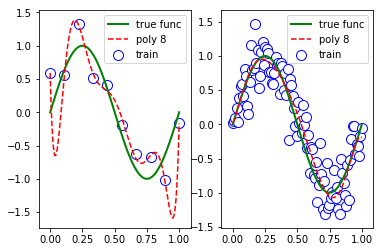

In [38]:
#FIRST WAY TO AVOID CURVE FITTING
# LARGER SAMPLE SIZE ALLOW FOR MORE PARAMETERS
for i,size in enumerate([10,100]):
    
    plt.subplot(121+i)    
    x=np.linspace(0,1,1000)
    plt.plot(x,np.sin(2*np.pi*x),'g',linewidth=2,label='true func')
    X1=np.linspace(0,1,size)
    train=datagen(X1,eps)
    plt.scatter(X1,train,s=100,label='train',facecolors='w',edgecolor='b')
    m=8
    p=np.polyfit(X1, train, m)
    yexp=np.poly1d(p)
    plt.plot(x,yexp(x),'r--',label='poly '+str(m))
    plt.legend()
    
plt.show()

In [50]:
#SECOND WAY TO AVOID CURVE FITTING
#FEW DATA POINTS? -> PENALIZED REGRESSION
#KEEP THE COEFFICIENTS CLOSE TO ZERO


#1)standard minimization

def sq_err(x,y,f,p=()):
    from scipy.optimize import minimize
    def cost(args):
        return np.sum((y-f(x,args))**2)*0.5
    return minimize(cost,p)
    



#2)penalized minimization
#1)standard minimization
def sq_err_ridge(x,y,f,lamb=0, p=()):
    from scipy.optimize import minimize
    def cost(args):
        return np.sum((y-f(x,args))**2)*0.5 + lamb*np.sum(args**2)*0.5
    return minimize(cost,p)
    

In [54]:
def my_poly(x,args=()):
    f=np.poly1d(args)
    return f(x)

x=np.arange(10)
args=tuple(np.array([1,1,1,1,1,1]))
y=my_poly(x,args)
#print(x,y)
#plt.plot(x,y)
#plt.show()

res = sq_err(x,y,my_poly,args).x
#print(res)
print('standard:',res)
res = sq_err_ridge(x,y,my_poly,lamb=1,p=args).x
print('penalized:',res)

standard: [1. 1. 1. 1. 1. 1.]
penalized: [1. 1. 1. 1. 1. 1.]


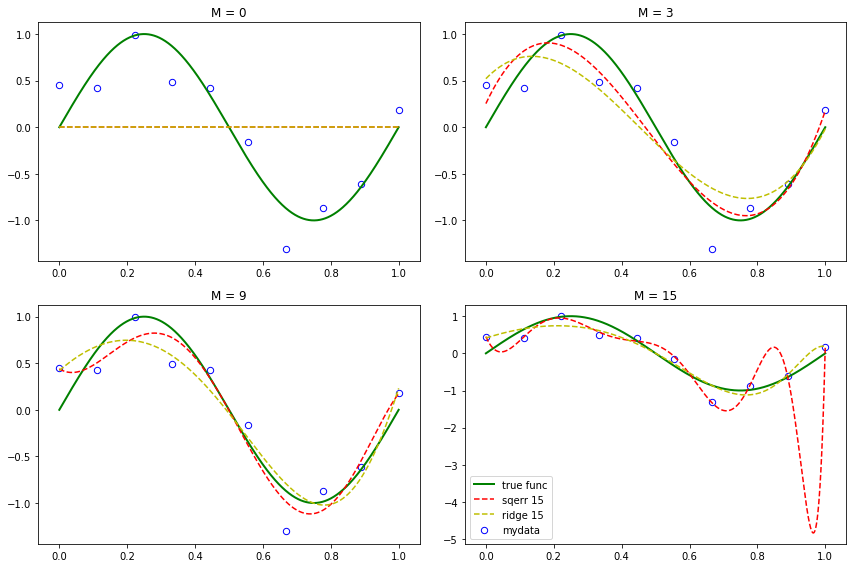

In [55]:

#LET'S APPLY TO THECASE BEFORE
#genero i dati
X=np.linspace(0,1,10)
eps=0.3
Y=datagen(X,eps) 
#genero x per plot dei fit
x=np.linspace(0,1,1000)
plt.figure(figsize=(12,8))

for i,m in enumerate([0,3,9,15]):
    plt.subplot(221+i)
    plt.scatter(X,Y,s=40,label='mydata',facecolors='w',edgecolor='b')
    plt.plot(x,np.sin(2*np.pi*x),'g',linewidth=2,label='true func')
    
    p=sq_err(X,Y,my_poly,np.zeros(m+1)).x
    yexp=np.poly1d(p)
    plt.plot(x,yexp(x),'r--',label='sqerr '+str(m))
    
    
    p=sq_err_ridge(X,Y,my_poly,lamb=0.001,p=np.zeros(m+1)).x
    yexp=np.poly1d(p)
    plt.plot(x,yexp(x),'y--',label='ridge '+str(m))
    
    plt.title('M = '+str(m))
    
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()


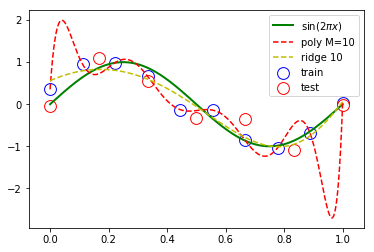

In [57]:
#COME VARIA LA PERFOMANCE SUI TEST CON LA PENALIZZAZIONE?
lamb=1e-3
x=np.linspace(0,1,1000)
plt.plot(x,np.sin(2*np.pi*x),'g',linewidth=2,label='$\sin(2\pi x)$')

#TRAIN
X1=np.linspace(0,1,10)
train=datagen(X1,eps)
plt.scatter(X1,train,s=140,label='train',facecolors='w',edgecolor='b')
m=10
p=np.polyfit(X1, train, m)
yexp=np.poly1d(p)
plt.plot(x,yexp(x),'r--',label='poly M='+str(m))

    
p=sq_err_ridge(X1,train,my_poly,lamb=0.001,p=np.zeros(m+1)).x
yexp=np.poly1d(p)
plt.plot(x,yexp(x),'y--',label='ridge '+str(m))

#TEST
X=np.linspace(0,1,7)
eps=0.25
test=datagen(X,eps)
plt.scatter(X,test,s=140,label='test',facecolors='w',edgecolor='r')

plt.legend()
plt.show()

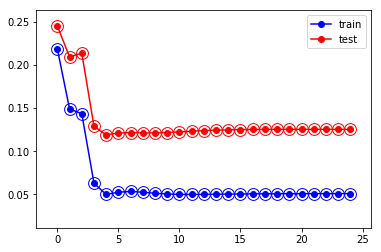

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.014,-1.582,1.349,11.684,8.110,3.885,0.818,-0.966,-1.804,-2.066,...,-0.927,-0.751,-0.601,-0.476,-0.372,-0.286,-0.215,-0.159,-0.110,-0.072
1,0.000,0.805,-2.930,-15.883,-1.084,3.103,2.993,1.742,0.567,-0.236,...,-0.743,-0.639,-0.539,-0.446,-0.364,-0.293,-0.231,-0.179,-0.133,-0.095
2,0.000,0.000,1.004,3.420,-11.009,-1.422,2.864,3.358,2.494,1.453,...,-0.532,-0.506,-0.461,-0.406,-0.349,-0.294,-0.243,-0.198,-0.155,-0.119
3,0.000,0.000,0.000,0.647,3.442,-9.067,-1.228,2.795,3.448,2.771,...,-0.288,-0.348,-0.363,-0.351,-0.324,-0.289,-0.251,-0.213,-0.176,-0.143
4,0.000,0.000,0.000,0.000,0.572,3.011,-8.858,-1.480,2.461,3.260,...,-0.006,-0.158,-0.241,-0.278,-0.285,-0.274,-0.252,-0.225,-0.195,-0.165
5,0.000,0.000,0.000,0.000,0.000,0.574,2.926,-8.933,-1.841,2.058,...,0.324,0.072,-0.087,-0.181,-0.228,-0.246,-0.244,-0.230,-0.210,-0.185
6,0.000,0.000,0.000,0.000,0.000,0.000,0.577,2.995,-8.882,-2.110,...,0.710,0.352,0.108,-0.051,-0.147,-0.200,-0.223,-0.226,-0.218,-0.202
7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.573,3.064,-8.721,...,1.155,0.695,0.356,0.121,-0.034,-0.130,-0.184,-0.209,-0.218,-0.212
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.567,3.092,...,1.640,1.108,0.672,0.349,0.124,-0.027,-0.121,-0.175,-0.204,-0.213
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.562,...,2.067,1.574,1.066,0.649,0.339,0.121,-0.025,-0.116,-0.173,-0.201


In [63]:
lamb=1e-3

mmax=25
testRMS=np.empty(mmax)
trainRMS=np.empty(mmax)
pp=np.zeros((mmax,mmax))
M=np.arange(mmax)
for m in M:
    p=sq_err_ridge(X1,train,my_poly,lamb=lamb,p=np.zeros(m+1)).x
    
    for i in np.arange(m+1):
            pp[i,m]=p[i]
    #print(p,pp[:,m])
    fexp=np.poly1d(p)
    
    trainexp=fexp(X1)
    trainRMS[m]=RMS(train,trainexp)
    
    testexp=fexp(X)
    testRMS[m]=RMS(test,testexp)


#OVERFITTING correction    
plt.scatter(M,trainRMS,s=140,facecolors='w',edgecolor='b')  
plt.scatter(M,testRMS,s=140,facecolors='w',edgecolor='r')
plt.plot(M,trainRMS,'ob-',label='train')  
plt.plot(M,testRMS,'or-',label='test')
plt.legend()
plt.show()

# EFFECT OF correction ON FIT COEFFICIENTS
mypolyfit=pd.DataFrame(pp).apply(lambda x: np.round(x,3))
mypolyfit
#mytable(mypolyfit)

In [64]:
print(m)

24


In [67]:
z=np.arange(10)
print(z,z[::-1])

[0 1 2 3 4 5 6 7 8 9] [9 8 7 6 5 4 3 2 1 0]


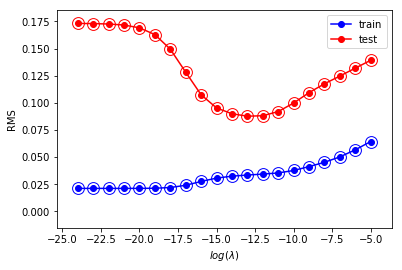

,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5
0,332.773,332.182,331.268,328.313,320.688,301.863,260.363,190.425,111.883,54.977,24.128,8.092,-0.228,-2.871,-2.469,-0.993,-0.089,-0.046,-0.371,-0.513
1,188.293,187.782,187.228,185.701,181.352,170.857,147.314,107.860,63.531,31.213,13.515,4.031,-0.980,-2.510,-1.981,-0.770,-0.069,-0.072,-0.356,-0.469
2,53.996,54.092,53.754,53.313,52.025,49.110,42.364,31.201,18.505,9.108,3.623,0.282,-1.592,-2.069,-1.455,-0.536,-0.050,-0.098,-0.337,-0.419
3,-64.038,-63.751,-63.742,-63.039,-61.601,-57.923,-49.815,-36.265,-21.128,-10.416,-5.125,-2.962,-2.014,-1.541,-0.894,-0.293,-0.033,-0.125,-0.314,-0.362
4,-158.255,-157.725,-157.562,-156.054,-152.275,-143.417,-123.638,-90.383,-53.039,-26.211,-12.189,-5.493,-2.183,-0.917,-0.306,-0.047,-0.019,-0.151,-0.286,-0.299


In [66]:
#WHAT IS THE IMPACT OF LAMBDA

lambda_=np.arange(5,25)
testRMS=np.empty(len(lambda_))
trainRMS=np.empty(len(lambda_))
pp=np.zeros((m+1,len(lambda_)))

for j,l in enumerate(lambda_):
    lamb = np.exp(-l)
    p=sq_err_ridge(X1,train,my_poly,lamb=lamb,p=np.zeros(m+1)).x
    #print(p)
    
    for i in np.arange(m+1):
            pp[i,j]=p[i]
    #print(p,pp[:,m])
    fexp=np.poly1d(p)
    
    trainexp=fexp(X1)
    trainRMS[j]=RMS(train,trainexp)
    
    testexp=fexp(X)
    testRMS[j]=RMS(test,testexp)

#effect of lambda  over PERFORMANCE    
plt.scatter(-lambda_[::-1],trainRMS[::-1],s=140,facecolors='w',edgecolor='b')  
plt.scatter(-lambda_[::-1],testRMS[::-1],s=140,facecolors='w',edgecolor='r')
plt.plot(-lambda_[::-1],trainRMS[::-1],'ob-',label='train')  
plt.plot(-lambda_[::-1],testRMS[::-1],'or-',label='test')
plt.xlabel('$log(\lambda)$')
plt.ylabel('RMS')
plt.legend()
plt.show()

# EFFECT OF lambda ON FIT COEFFICIENTS
mypolyfit=pd.DataFrame(pp).apply(lambda x: np.round(x,3))
mypolyfit.columns=lambda_
mypolyfit=mypolyfit[mypolyfit.columns[::-1]]
mypolyfit.columns=-mypolyfit.columns
mypolyfit.head()
#mytable(mypolyfit)

# Bayesian fitting

# CALCULATE LIKELIHOOD OF DATA

In [73]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline

In [74]:
def datagen(x,eps):
    return np.sin(2*np.pi*x) + st.norm.rvs(size=len(x),loc=0,scale=eps)

def my_poly(x,args=()):
    f=np.poly1d(args)
    return f(x)
#1)standard minimization

def sq_err(x,y,f,p=()):
    from scipy.optimize import minimize
    def cost(args):
        return np.sum((y-f(x,args))**2)*0.5
    return minimize(cost,p)
    



#2)penalized minimization
#1)standard minimization
def sq_err_ridge(x,y,f,lamb=0, p=()):
    from scipy.optimize import minimize
    def cost(args):
        return np.sum((y-f(x,args))**2)*0.5 + lamb*np.sum(args**2)*0.5
    return minimize(cost,p)
    

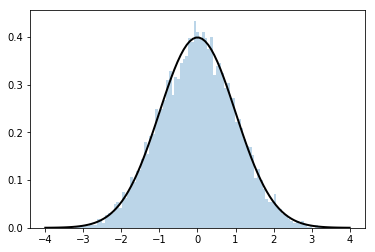

(0.9997146725654602, 0.17360112071037292)


/usr/local/lib/python3.5/dist-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [78]:
#1) GENERATE DATA:

#I) GENERATE GAUSSIAN FROM CLT
n=10000
def gauss_gen(n,mu,sigma):
    sample=np.array([np.mean(10*np.random.random_sample(size=10)) for i in np.arange(n)])
    return (sample -np.mean(sample))*sigma/np.std(sample)+mu

sample= gauss_gen(n,0,1)
plt.hist(sample,bins=100,density=True, alpha=0.3,label='mygen')
popt=st.norm.fit(sample)
x=np.linspace(-4,4,100)
y=st.norm.pdf(x,*popt)
plt.plot(x,y,'k-',linewidth=2)
plt.show()
print(st.shapiro(sample))

In [79]:
st.norm?

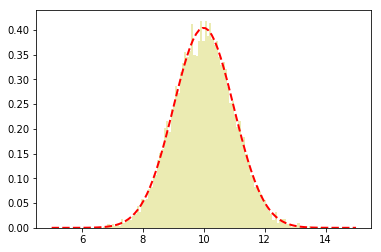

(0.9998549818992615, 0.8082903027534485)


/usr/local/lib/python3.5/dist-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [88]:
#II) GENERATE GAUSS WITH PACKAGE STATS
sample=st.norm.rvs(size=n,loc=10,scale=1)
plt.hist(sample,bins=100,density=True,color='y', alpha=0.3,label='stat')
popt=st.norm.fit(sample,loc=np.mean(sample),scale=1)
x=np.linspace(5,15,100)
y=st.norm.pdf(x,*popt)
plt.plot(x,y,'r--',linewidth=2)
plt.show()
print(st.shapiro(sample))

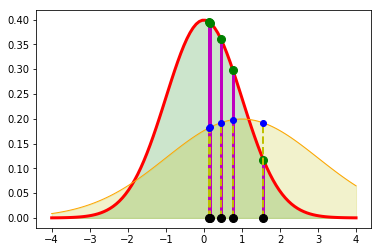

like: 0.0019581159848054155 ; like2: 0.00024291707213745518


In [92]:

#USIAMO METODO 2
n=5
sample=st.norm.rvs(size=n)
def LH(sample,dist,args=()):
    return np.prod(dist(sample,*args))
    

f=st.norm.pdf
x=np.linspace(-4,4,100)
y=f(x)
plt.plot(x,y,'r',linewidth=3)
plt.fill_between(x,y,color='g',alpha=0.2)
for s in sample:
    plt.plot([s,s],[0,f(s)],'m-',linewidth=3)
plt.plot(sample,f(sample),'og',markersize=8)

like = LH(sample,f)


y=f(x,1,2)
plt.plot(x,y,'orange',linewidth=1)
plt.fill_between(x,y,color='y',alpha=0.2)
for s in sample:
    plt.plot([s,s],[0,f(s,1,2)],'y--',linewidth=2)
plt.plot(sample,f(sample,1,2),'ob',markersize=6)


plt.plot(sample,[0]*len(sample),'ok',markersize=8)
plt.show()


like2 = LH(sample,f,[1,2])

print('like:',like,'; like2:',like2)

In [93]:
#SINCE WE ARE DEALING WITH SMALLER AND SMALLER NUMBERS 
#IT CAN BE USEFUL DEAL WITH LOG LIKELIHOOD

def log_LH(sample,dist,args=()):
    return np.sum(np.log(dist(sample,*args)))

like = log_LH(sample,f)

like2 = log_LH(sample,f,[1,2])
print('like:',like,'; like2:',like2)

like: -6.23577250026182 ; like2: -8.322790439792588


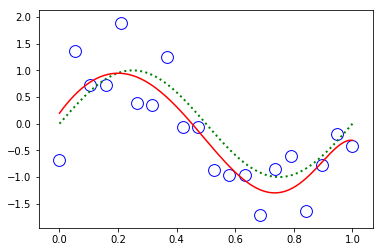

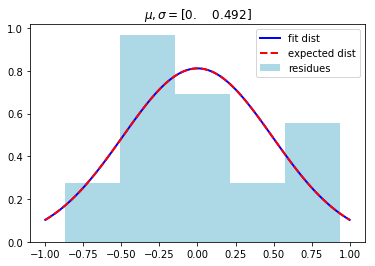

In [97]:

#ASSUMIAMO CHE LE OSSERVABILI SIANO DISTRIBUITE COME UNA GAUSSIANA INTORNO AL VALORE ATTESO
#COME LO VEDIAMO?
#RIPRENDIAMO IL POLINOMIO

lamb=1e-3
eps=0.5

x=np.linspace(0,1,1000)
plt.plot(x,np.sin(2*np.pi*x),'g:',linewidth=2,label='$\sin(2\pi x)$')

#TRAIN
X1=np.linspace(0,1,20)
Y1=datagen(X1,eps)
plt.scatter(X1,Y1,s=140,label='train',facecolors='w',edgecolor='b')
m=9
    
p=sq_err_ridge(X1,Y1,my_poly,lamb=0.001,p=np.zeros(m+1)).x
yexp=np.poly1d(p)
plt.plot(x,yexp(x),'r-',label='ridge '+str(m))
plt.show()
#eq1.63 
distance = Y1 -yexp(X1)
plt.hist(distance,bins=5,density=True,color='lightblue',label='residues')
popt=st.norm.fit(distance)
x=np.linspace(-1,1,100)
plt.plot(x, st.norm.pdf(x,*popt),'b-',linewidth=2,label='fit dist')

var=np.var(distance)
plt.plot(x, st.norm.pdf(x,0,np.sqrt(var)),'r--',linewidth=2,label='expected dist')
plt.title('$\mu,\sigma = $' +str(np.round(popt,3)))
plt.legend()
plt.show()


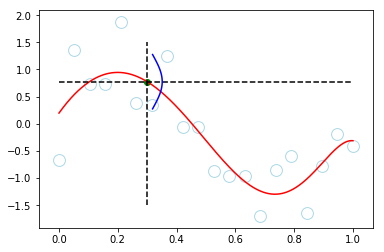

In [98]:

#PRECISION PARAMETER IS THE INVERSE OF THE VARIANCE DISTRIBUTION
plt.scatter(X1,Y1,s=140,label='train',facecolors='w',edgecolor='lightblue')
m=9

x=np.linspace(0,1,1000)
plt.plot(x,yexp(x),'r-',label='ridge '+str(m))

x0=0.3
xm=yexp(x0)
plt.plot([x0,x0],[-1.5,1.5],'k--')
plt.plot([0,1],[xm,xm],'k--')
plt.scatter(x0,xm,color='g')
x=np.linspace(xm-0.5,xm+0.5,100)
y=st.norm.pdf(x,xm,popt[1])
plt.plot(y/10+x0*0.9,x,'b')
plt.show()


# fit by minimizing negative LOG LIKELIHOOD

eps=sqrt(1/beta)= 0.17 , p= [-38.013  52.238  27.124 -38.096 -31.833  56.64  -37.752   9.978  -0.072]


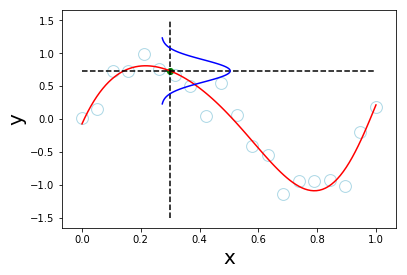

In [105]:

#COME FACCIAMO A INCLUDERE QUESTA INFORMAZIONE NEL FIT 
#EQ 1.62 VOGLIAMO MASSIMIZZARE LA LOG LIKELIHOOD

def log_LH_GaussNoise(x,y,f,beta=1,args=()):
    yexp=f(x,args)
    return -beta*0.5*np.sum((yexp-y)**2)+len(x)*np.log(beta)*0.5-N*0.5*np.log(2*np.pi)

#Pcondizionata delle osservazioni dato il fato 
#che si assumono distribuite in modo gaussiano intorno al valore atteso
#Le p di ogni osservazione indipendenti quindi la totale è il prodotto delle singole

def min_neglog_LH_GaussNoise(x,y,f,p=[1,()]):
    from scipy.optimize import minimize
    def neg_log_LH_GaussNoise(args):
        beta=args[0]
        w=args[1:]
        yexp=f(x,w)
        N=len(x)
        ll= -beta*0.5*np.sum((yexp-y)**2)+N*np.log(beta)*0.5-N*0.5*np.log(2*np.pi)
        return -ll
    bnds = np.array([(0, None)]+[(None,None)]*len(p[1:])) 
    return minimize(neg_log_LH_GaussNoise,p,method='SLSQP',bounds=bnds)

#def f(x,args=[1,2*np.pi]):
  #  a,b=args[0],args[1]
   # return a*np.sin(b*x)

f=my_poly
x=np.linspace(0,1,20)
eps=0.2
y=datagen(x,eps)

#res= min_neglog_LH_GaussNoise(x,y,f,p=[0.4,1,5]).x
res= min_neglog_LH_GaussNoise(x,y,f,p=[0.4,0.1,0.1,0.1,0.01,0.001,0,0,0.1,0.1]).x
print('eps=sqrt(1/beta)=',np.round(np.sqrt(1/res[0]),2), ', p=',np.round(res[1:],3))


plt.scatter(x,y,s=140,label='train',facecolors='w',edgecolor='lightblue')

x=np.linspace(0,1,100)
plt.plot(x,f(x,res[1:]),'r-')

x0=0.3
xm=f(x0,res[1:])
plt.plot([x0,x0],[-1.5,1.5],'k--')
plt.plot([0,1],[xm,xm],'k--')
plt.scatter(x0,xm,color='g')
x=np.linspace(xm-0.5,xm+0.5,100)
y=st.norm.pdf(x,xm,np.sqrt(1/res[0]))
plt.plot(y/10+x0*0.9,x,'b')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.show()

# A STEP TOWARD BAYESIAN APPROACH: MAP

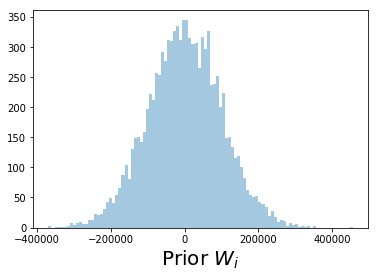

In [106]:
# gaussian prior with zero mean
#Variables such as α, which control
#the distribution of model parameters, are called hyperparameters
alpha=0.00001 #low alpha -> low precision
prior=st.norm.rvs(size=10000,loc=0,scale=1/alpha)
_=plt.hist(prior,bins=100,alpha=0.4)
plt.xlabel('Prior $W_i$',fontsize=20)
plt.show()

In [107]:
#FOR EACH OF THEPARAMETER WE HAVE A PRIOR DISTRIBUTION
#considering gaussian prior it is possible to determine the posterior
#maximize posterior to obtein opt parameter --> MAP
#the same is minimize negative log of the posterior
#equivalente a una ridge regression con lambda=alpha/beta
def MAP(x,y,f,alpha=1,p=[1,()]):
    from scipy.optimize import minimize
    def neg_log_Posterior(args):
        beta=args[0]+1e-4       
        w=args[1:]
        yexp=f(x,w)
        return 0.5*np.sum((yexp-y)**2)+alpha*0.5*np.sum(w**2)/beta
    bnds = np.array([ (0, None)]+[(None,None)]*len(p[1:]))     
    return minimize(neg_log_Posterior,p,method='SLSQP',bounds=bnds)

eps=sqrt(1/beta)= 0.27 , lambda= 7.468976606864788e-07 , p= [  5.144   1.132  -2.331  -5.063  -6.864  -7.53   -6.882  -4.817  -1.396
   3.021   7.604  10.871  10.702   5.002  -5.927 -14.303  -3.628   5.456
   0.038]
meas data std: 0.1404986285951739


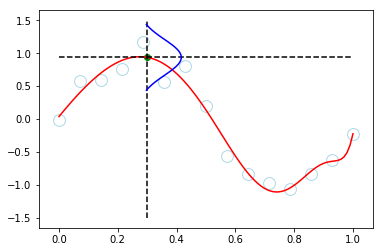

In [108]:
x=np.linspace(0,1,15)
eps=0.2
y=datagen(x,eps)
plt.scatter(x,y,s=140,label='train',facecolors='w',edgecolor='lightblue')

def f(x,args=[1,2*np.pi]):
    a,b=args[0],args[1]
    return a*np.sin(b*x)

f=my_poly
#res= MAP(x,y,f,p=[16,0.001,1,7]).x
res= MAP(x,y,f,alpha,p=[1]+[0.1]*20).x
print('eps=sqrt(1/beta)=',np.round(np.sqrt(1/res[0]),2), ', lambda=',alpha/res[0],', p=',np.round(res[2:],3))

print('meas data std:',np.std(y-f(x,res[1:])))
#m=20
#p=np.polyfit(x, y, m)

x=np.linspace(0,1,100)
plt.plot(x,f(x,res[1:]),'r-')


#yexp=np.poly1d(p)
#plt.plot(x,yexp(x),'r--',label='poly M='+str(m))


x0=0.3
xm=f(x0,res[1:])
plt.plot([x0,x0],[-1.5,1.5],'k--')
plt.plot([0,1],[xm,xm],'k--')
plt.scatter(x0,xm,color='g')
x=np.linspace(xm-0.5,xm+0.5,100)
y=st.norm.pdf(x,xm,np.sqrt(1/res[0]))
plt.plot(y/10+x0*0.9,x,'b')
plt.show()

#point estimate of w and so this does not yet amount to a Bayesian treatment
myparameters=res[2:]

# Predictive distribution

In [ ]:
#In the curve fitting problem, we are given the training data x and t, along with
#a new test point x, and our goal is to predict the value of t
#the posterior of the parameter is the new prior
#the lh is given train and parameter
#the product is integrated over the parameter range -> marginalization
# posterior is P of new data given previuos observations

